In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils

In [19]:
data=np.array([[1.2, 0.5, 2.0, 0.],[2.5, 1.2, 3.5, 1.],
               [1.8, 0.8, 2.8, 0.],[3.2, 1.5, 4.0, 1.],[3.8, 1.8, 4.5, 1.]]) 
df=pd.DataFrame(data,columns=['Tumor Size', 'Cell Density', 'Clump Thickness', 'Cancer'])

In [20]:
df.sort_values(by=list(df.columns))

,Tumor Size,Cell Density,Clump Thickness,Cancer
0,1.2,0.5,2.0,0.0
2,1.8,0.8,2.8,0.0
1,2.5,1.2,3.5,1.0
3,3.2,1.5,4.0,1.0
4,3.8,1.8,4.5,1.0


<Axes: >

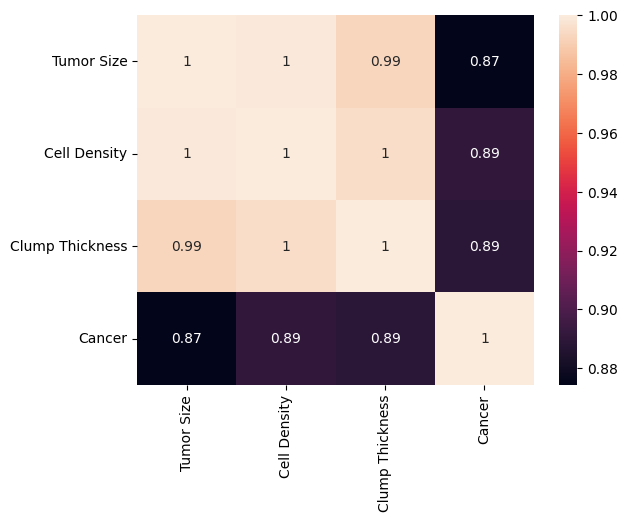

In [21]:
sns.heatmap(df.corr(),annot=True)

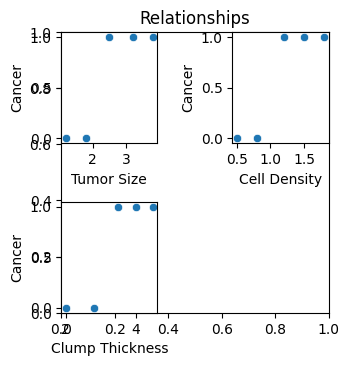

In [22]:
utils.scatterplots(df,'Relationships','Cancer',plot_size=2,maxfigwidth=20)

SVC model

In [23]:
df=utils.normalize(df,'Cancer')

In [24]:
y=df['Cancer']
X=df.drop(columns='Cancer')

In [25]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_split =train_test_split(X,y,test_size=.2,random_state=43,shuffle=True)

In [26]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [37]:
params={'C':np.linspace(0.000_000_000_000_000_001,.00000001,20),'kernel':['linear','rbf']}
model=GridSearchCV(SVC(),params,cv=2)
model.fit(X_train,y_train)
best_estimator=model.best_estimator_
best_score=model.best_score_
best_params=model.best_params_
print(best_estimator)
print(best_score)
print(best_params)


SVC(C=1e-18, kernel='linear')
1.0
{'C': 1e-18, 'kernel': 'linear'}


In [40]:
model1=SVC(C=0.000_000_000_000_000_001,kernel='linear')
model1.fit(X_train,y_train)

SVC(C=1e-18, kernel='linear')

In [42]:
y_test_pred=model1.predict(X_test)
y_train_pred=model1.predict(X_train)
y_overall_pred=model1.predict(X)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
confusionmatrix=confusion_matrix(y,y_overall_pred)
print('confusion_matrix')
print(confusionmatrix)

confusion_matrix
[[2 0]
 [0 3]]


#
predict cancer
Predict cancer type for a tumor with Tumor Size = 2.8, Cell Density = 1.0, Clump 
Thickness = 3.2.

In [49]:
#Tumor Size = 2.8, Cell Density = 1.0, Clump Thickness = 3.2
#the order of features is the same as the model
Physical_assessment=pd.Series([2.8,1.0,3.2])
new_prediction=model1.predict([Physical_assessment])

print(new_prediction==0.0)

[False]


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


This prediction had a lot of borderline points.  It is a sign that more data would make the model more reliable